## Background :
The aim is to pass images of my twin-brother through the model and see if it works.

## To Do :
* Take pictures without the mask.

In [91]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image  

import torch
import torchvision
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from torchvision import models
import torch.nn as nn

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## The Model :

In [3]:
model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10)

network = model_ft.to(device)
#print(network)

## Load model :

In [4]:
path_to_model = './model_res18_94.pt'
network.load_state_dict(torch.load(path_to_model, map_location={'cuda:0': 'cpu'}))

<All keys matched successfully>

## Open image :

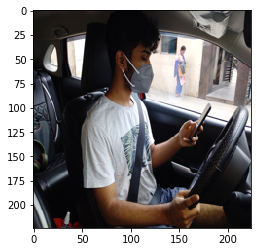

In [6]:
img=Image.open('images/dummy_class/2.jpg')
img = img.resize((224,224))
rotated_img = img.rotate(180)
plt.imshow(rotated_img)

## Define transformations and data-loader :

In [102]:
transformations_n = transforms.Compose([
                                #transforms.ToPILImage(),
                                transforms.Resize((224,224), interpolation=2),
                                transforms.ToTensor()
                                ])

r_data = torchvision.datasets.ImageFolder(root='images/', transform=transformations_n)
print(len(r_data))

test_loader = torch.utils.data.DataLoader(
     r_data
    ,batch_size=1
    ,shuffle=True
)

10


## Plot Sample images :

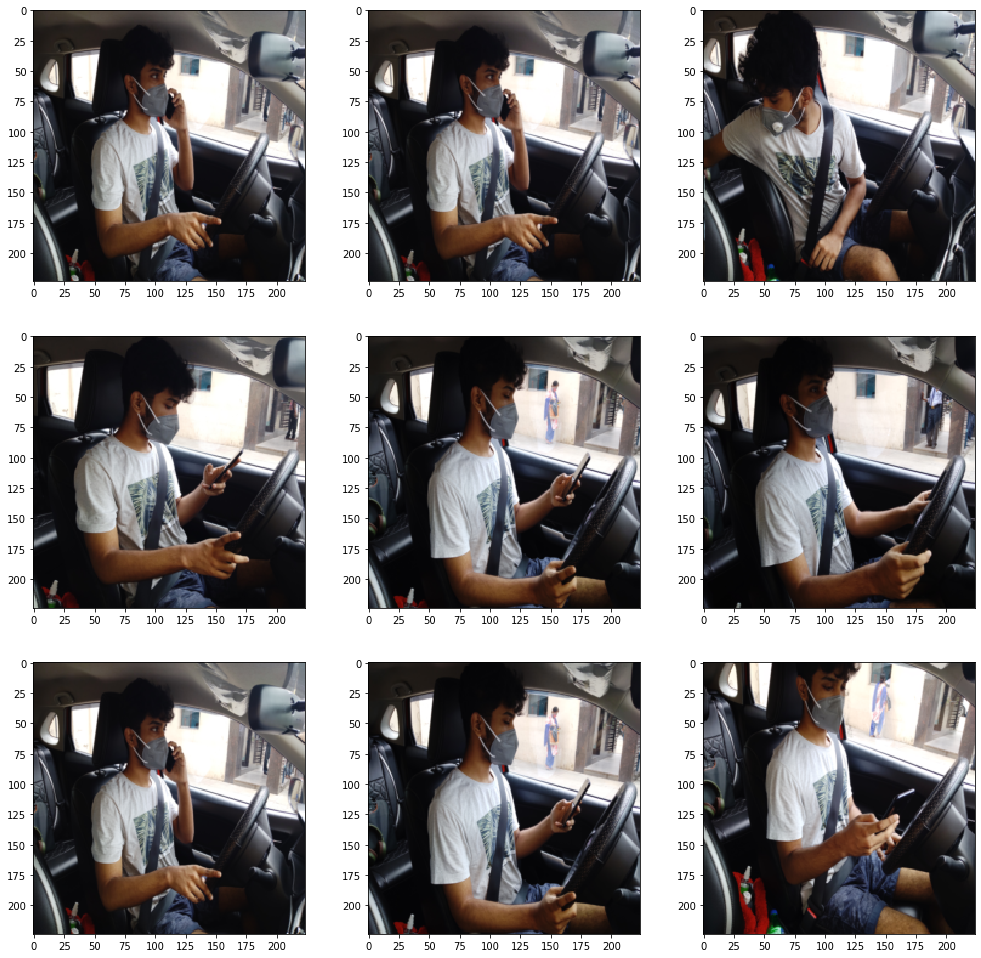

In [131]:
fig, axs = plt.subplots(3, 3, figsize=(17,17))

for i in range(3):
    for j in range(3):
        for image, dummy_label in (test_loader_3):
            x=np.transpose(image[0], (1, 2, 0))  #(224x224x3)
            axs[j,i].imshow(x, interpolation='none')
            break
            
plt.show()

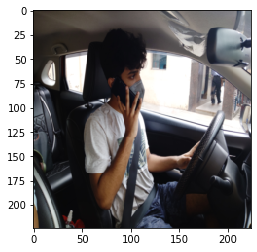

Predicted class: talk on phone-R


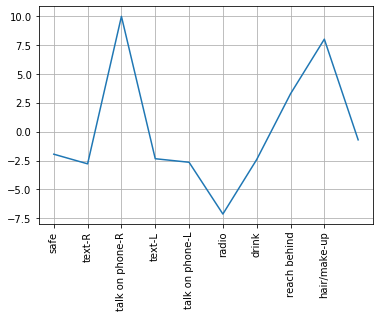

In [89]:
class_list = ['safe', 'text-R', 'talk on phone-R', 'text-L', 'talk on phone-L', 'radio', 'drink'
, 'reach behind', 'hair/make-up', 'talk to passenger']

for image, lab in (test_loader_3):
    
    image=image.cpu()
    x=np.transpose(image[0], (1, 2, 0))  
    plt.imshow(x, interpolation='none')
    plt.show()

    with torch.no_grad():

            network.eval()
            images = image.to(device)
            lab=network(image[0].unsqueeze(0))
            lab = lab.cpu()
            #print(lab[0])
            max_index = np.argmax(lab[0]) 
            predicted_label = class_list[max_index]
            print('Predicted class:', predicted_label)
            break

plt.plot(lab[0])
plt.xticks([i for i in range(9)], class_list, rotation='vertical')
plt.grid()
plt.show()